# Instituto Tecnológico de Costa Rica (ITCR)
# Sede Interuniversitaria de Alajuela
# Escuela de Computación
# Curso: Inteligencia Artificial

María Auxiliadora Mora
Instituto Tecnológico de Costa Rica, 

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en jupyter ( .IPYNB ). 

Modo de trabajo: Individual o en grupos de máximo dos personas.

Estudiantes: 

Brandon Ledezma Fernandéz

Walter Morales Vásquez

---



Resumen En el presente trabajo se repasarán conceptos elementales respecto a álgebra linea.


---


## Pregunta 1. Vectores (15 puntos, 5 puntos / cu)

---

Sean los siguientes vectores:

$\vec{v}_{1}=\begin{bmatrix}-0.3\\
0.8\\
0.1
\end{bmatrix}, \vec{v}_{2}=\begin{bmatrix}0.5\\
0.2\\
0.4
\end{bmatrix} y \vec{v}_{3}=\begin{bmatrix}\frac{1}{\sqrt{2}}\\
\frac{-1}{\sqrt{2}}\\
0
\end{bmatrix} $

Resuelva los siguientes ejercicios:

a) Graficación de vectores. Usando Python grafique juntos los vectores anteriores (puede utilizar la función quiver). 

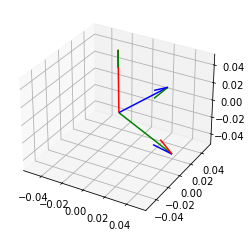

In [4]:
# Se importan las bibliotecas de torch para los tensores y matplotlib para graficar
import torch
import matplotlib.pyplot as plt
import math

# Se asignan los valores a los tensores
v1 = torch.tensor([-0.3, 0.8, 0.1])
v2 = torch.tensor([0.5, 0.2, 0.4])
v3 = torch.tensor([1/math.sqrt(2), -1/math.sqrt(2), 0.])

# se instancia la figura y se configura para proyección 3D
fig = plt.figure()
ax = fig.gca(projection='3d')

# se establece el punto de origen
origin = [0,0,0]

# se ingresan los valores a graficar, los parámetros extra se pueden variar para una mejor visualización
ax.quiver(origin, origin, origin, v1, v2, v3, color=['r', 'g', 'b'], length=0.06, normalize=True)

# se visualiza la figura
plt.show()

b) Implemente una función que recibe tensores de Pytorch y calcula el ángulo en grados entre esos tensores. Pruebe su función calculando el ángulo entre los vectores $\vec{v}_{1}y \vec{v}_{2,}\vec{v}_{2}$ y $\vec{v}_{3}$. Implemente la fórmula en Pytorch, sin usar las funciones correspondientes de la biblioteca (es decir deben programar la fórmula del cálculo del ángulo).

In [2]:
import math


# Función encargada de calcular el producto punto entre dos tensores de torch
# v1: tensor de torch de largo n
# v2: tensor de torch de largo n
# return: el resultado de la suma de la multiplicación de cada elemento de los vectores
def producto_punto(v1, v2):
    sum = 0
    for i in range(v1.shape[0]): # Se iteran los vectores
        x = v1[i]  
        y = v2[i]
        sum += x * y # Se multiplican los valores 
    return sum


# Función para calcular la norma de un vector
# v: tensor de torch
# return: flotante con el valor resultado de elevar los elementos al cuadrado los elementos 
# y obtener la raíz cuadrada.
def norma_vector(v):
    return math.sqrt(producto_punto(v, v))


# Función para obtener el angulo entre dos vectores de torch
# v1: tensor de torch de largo n
# v2: tensor de torch de largo n
# return: valor en grados del resultado de dividir el producto_punto entre la multiplicación de
# la norma del primer vector y el segundo
def angulo_entre_vectores(v1, v2):
    return math.acos(producto_punto(v1, v2)/(norma_vector(v1) * norma_vector(v2))) * 180.0 / math.pi
    
print("Angulo entre v1 y v2:", angulo_entre_vectores(v1, v2))
print("Angulo entre v2 y v3:", angulo_entre_vectores(v2, v3))

Angulo entre v1 y v2: 85.02932355474991
Angulo entre v2 y v3: 71.5650513054548


c) Calcule la distancia en $\ell_{1}$y$\ell_{2}$ entre los vectores $\vec{v}_{1}$y$\vec{v}_{2,}\vec{v}_{2}y\vec{v}_{3}$, implementando la fórmula en Pytorch, sin usar las funciones correspondientes de la biblioteca. Compare el resultado obtenido con el uso de la función torch.norm.

In [3]:
# Función para calcular la distancia L1 entre dos tensores
# v1: tensor de torch de largo n
# v2: tensor de torch de largo n
# return: resultado de la suma del valor absoluto de la multiplicación de los valores en los tesores
def distancia_entre_vectores_l1(v1, v2):
    sum = 0
    for i in range(v1.shape[0]):
        x = v1[i]  
        y = v2[i]
        sum += abs(x * y)
    return sum


# Función para calcular la distancia L1 entre dos tensores
# v1: tensor de torch de largo n
# v2: tensor de torch de largo n
# return: resultado de la raíz cuadrada de la suma del valor  de la multiplicación 
# de los valores en los tesores al cuadrado
def distancia_entre_vectores_l2(v1, v2):
    sum = 0
    for i in range(v1.shape[0]):
        x = v1[i]  
        y = v2[i]
        sum += (x * y) * (x * y)
    return math.sqrt(sum)

print("Distancia L1 entre v1 y v2:", distancia_entre_vectores_l1(v1, v2))
# print(torch.norm(((v1 * v2)), 1, -1))

print("Distancia L2 entre v2 y v3:", distancia_entre_vectores_l2(v2, v3))
# print(torch.norm(((v2 * v3)), 2, -1))

Distancia L1 entre v1 y v2: tensor(0.3500)
Distancia L2 entre v2 y v3: 0.3807886498146641


## Pregunta 2. Matrices (15 puntos)

---

### 1) Convolución

a) (4 puntos) Programe manualmente usando tensores de Pytorch, pero sin utilizar funciones predefinidas en la biblioteca, la función convolucion2D que reciba una imagen, un kernel de cualquier tamaño, el tamaño del padding a aplicar y devuelva la imagen resultante de la convolución.

In [5]:
import numpy as np
from skimage import io, color
import cv2

# Función utilizada para calcular el valor de la convolución para una matriz o imagen
# imagen: imagen de dos dimenciones original
# kernel: filtro que se aplicara a la imagen
# padding: relleno que se le aplicará a la imagen
def convolucionar_2d(imagen, kernel, padding=0):

    # Gather Shapes of Kernel + Image + Padding
    largo_xKernel = kernel.shape[0]
    largo_yKernel = kernel.shape[1]
    largo_xImagen = imagen.shape[0]
    largo_yImagen = imagen.shape[1]
    # se calcula el tamaño de la matriz convolucionada resultado
    resultado_x = int((largo_xImagen - largo_xKernel + 2 * padding) + 1)
    resultado_y = int((largo_yImagen - largo_yKernel + 2 * padding) + 1)
    resultado = np.zeros((resultado_x, resultado_y))
    # Se aplica el padding a la matriz, siempre y cuando no sea cero
    if padding != 0:
        imagen_padding = np.zeros((imagen.shape[0] + padding*2, imagen.shape[1] + padding*2))
        imagen_padding[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = imagen
    else:
        imagen_padding = imagen
    # Se itera la imagen para aplicar la convulución con el kernel
    for y in range(imagen.shape[1]):
        # termina cuando el kernel ya recorrio la matriz y sobrepasa el numero de columnas
        if y > imagen.shape[1] - largo_yKernel:
            break
        # se calcula la convolución solo si se avanzo correctamente.
        for x in range(imagen.shape[0]):
            # se aumenta el numero de fila cuando el kernel sale del tamaño de la matriz
            if x > imagen.shape[0] - largo_xKernel:
                break
            # se realizan los cambios en la matriz resultado.
            resultado[x, y] = (kernel * imagen_padding[x: x + largo_xKernel, y: y 
                                                               + largo_yKernel]).sum()
    return resultado

b) (2 puntos) Cargue una imagen de prueba en escala de grises o convierta alguna imagen a escala de grises (adjunte el archivo de imagen de prueba con el archivo del trabajo).

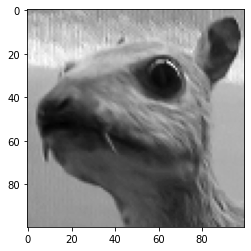

In [5]:
# Se utilizará la imagen kangaroo.png, una imagen de prueba que deberá ser convertida
# a escala de grises.

# Función utilizada para cargar una imagen y aplicar filtro de escala de grises
# imagen: string de la ruta de la imagen en disco.
# return imagen en escala de grises
def procesar_imagen(image): 
  image = cv2.imread(image) 
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
  return image

img_original = procesar_imagen('datos/kangaroo.png')
plt.imshow(img_original, cmap='gray')

c) (3 puntos) Investigue qué son los filtros de desenfoque gaussiano y aplique al menos dos kernels de este tipo con diferentes tamaño en su imagen utilizando la función convolucion2D que desarrolló en el punto 1.

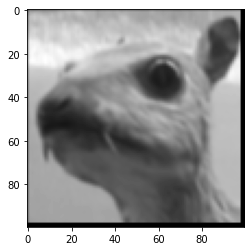

In [6]:
# Se crea un kernel de tamaño 3 * 3 y se aplica a la imagen
kernel_gaussiano1 = np.array([[1,2,1],
                              [2,4,2],
                              [1,2,1]]) * 1/16

imagen_desenfocada1 = convolucionar_2d(img_original, kernel_gaussiano1, padding=1)
plt.imshow(imagen_desenfocada1, cmap='gray')

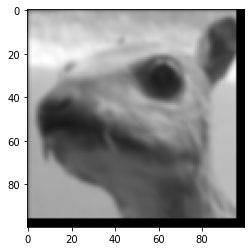

In [7]:
# Se crea un kernel de tamaño 5 * 5 y se aplica a la imagen
kernel_gaussiano2 = np.array([[1,4,6,4,1],
                              [4,16,24,16,4],
                              [6,24,36,24,6],
                              [4,16,24,16,4],
                              [1,4,6,4,1]]) * 1/256

imagen_desenfocada2 = convolucionar_2d(img_original, kernel_gaussiano2, padding=2)
plt.imshow(imagen_desenfocada2, cmap='gray')

### 2) Pseudo inversa de una matriz. (6 puntos)

Cree dos funciones que reciban una matriz, calculen su pseudo inversa y demuestre que se cumplen cada una de las siguientes propiedades (una propiedad por función):

a) $ \left(A^{T}A\right)^{-1}A^{T}\approx A^{+} $

b)  $\left(A^{T}A\right)^{+}A^{T}=A^{+}$

Pruebe sus funciones con una matriz invertible y con una no invertible.

In [8]:
# Función para sumar todos los elementos de una matriz
def sumar_elementos(matriz):
    
    result = 0
    for i in range(len(matriz)):
        for j in range(len(matriz[0])):
            result += matriz[i][j]
    return result

# Método para restar dos matrices
def restar_matrices(matriz1, matriz2):
    
    # Si las matrices no se pueden restar se retorna False
    if(len(matriz1) != len(matriz2) or len(matriz1[0]) != len(matriz2[0])):
       return False

    resultado = matriz_ceros(len(matriz1), (len(matriz1[0])))
    for i in range(len(matriz1)):
       for j in range(len(matriz1[0])):
            resultado[i][j] = matriz1[i][j] - matriz2[i][j]
    return resultado

# Función que retorna una matriz de zeros de las dimensiones dadas
def matriz_ceros(filas, columnas):
    return [([0]*columnas) for i in range(filas)]

# Función para multiplicar dos matrices
def multiplicar_matrices(matriz1, matriz2):
    
    # Si las matrices no se pueden multiplicar se retorna False
    if len(matriz1[0]) != len(matriz2):
        return False
    
    resultado = matriz_ceros(len(matriz1), len(matriz2[0]))
    for i in range(len(matriz1)):
        for j in range(len(matriz2[0])):
            for k in range(len(matriz2)):
                resultado[i][j] += matriz1[i][k] * matriz2[k][j]
    return resultado

# Función que retorna la matriz identidad de otra matriz
def calcular_identidad(AM):
    
    # Si la matriz no es cuadrada se retorna False
    if len(AM) != len(AM[0]):
        return False
    
    resultado = matriz_ceros(len(AM), len(AM[0]))
    for i in range(len(AM)):
        resultado[i][i] = 1
    return resultado

# Función para calcular la matriz transpuesta de otra matriz
def calcular_transpuesta(matriz):
    
    filas = len(matriz)
    columnas = len(matriz[0])
    transpuesta = matriz_ceros(columnas, filas)
    for i in range(filas):
        for j in range(columnas):
            transpuesta[j][i] = matriz[i][j]
    return transpuesta

# Función para obtener el cofactor de una matriz en la posición p, q
def obtener_cofactores(matriz, temp, p, q, n):
    
    row = 0
    col = 0
    for i in range(n):
        for j in range(n):
            # Se copia en la matriz temporal los elementos que no
            # están en la fila y columna dadas
            if i != p and j != q:
                temp[row][col] = matriz[i][j]
                j+=1
  
                # Si la fila se encuentra llena, se aumenta en 1
                # el índice de las filas y se pone en zero el
                # índice de columnas
                if j == (n - 1):
                    j = 0
                    i+=1
    return temp

# Método para obtener el determinante de una matriz, es necesario especificar 
# la cantidad de filas actuales
def obtener_determinante(matriz, n):
    
    det = 0
    # Caso base
    if (n == 1):
        return matriz[0][0];
  
    temp= matriz_ceros(n,n)
    # Se inicia con signo positivo
    signo = 1
    for i in range(n):
        # Se utilizan los cofactores para obtener el determinante
        temp = obtener_cofactores(matriz, temp, 0, i, n)
        det += signo * matriz[0][i] * obtener_determinante(temp, n - 1)
        
        # Se alternan los signos de los elementos
        signo = -signo
    return det

# Función para obtener la matriz adjunta de una matriz
def obtener_adjunta(matriz, adj):
    
    # Si la cantidad de filas es 0 retornamos la matriz adjunta
    # con un 1 en su primera posición
    if len(matriz) == 1:
        adj[0][0] = 1
        return adj

    # Se inicia con signo positivo
    signo = 1
    # Se usa temp para almacenar los cofactores de la matriz
    temp = matriz_ceros(len(matriz),len(matriz))
  
    for i in range(len(matriz)):
        for j in range(len(matriz[0])):
            # Se obtienen los cofactores de la matriz en i, j
            temp = obtener_cofactores(matriz, temp, i, j, len(matriz))
  
            # El signo de adj en i, j es positico si la suma de filas y
            # columnas es par
            signo = 1 if ((i+j)%2==0) else -1

            # Se intercambian las filas y columnas para obtener la
            # transpuesta del cofactor de la matriz
            adj[j][i] = (signo)*(obtener_determinante(temp, len(matriz)-1))
    return adj
    
# Método para calcular la inversa de una matriz, retorna False en caso
# de que la matriz sea singular
def calcular_inversa(matriz):
    
    # Se obtiene el determinante de la matriz y se comprueba si es cero
    det = obtener_determinante(matriz, len(matriz))
    if (det == 0):
        print("Matriz singular")
        return False

    inverse = matriz_ceros(len(matriz),len(matriz))
    # Se busca la matriz adjunta
    adj = matriz_ceros(len(matriz),len(matriz))
    adj = obtener_adjunta(matriz, adj)

    # Se obtiene la inversa usando la fórmula "inversa(A) = adj(A)/det(A)"
    for i in range(len(matriz)):
        for j in range(len(matriz)):
            inverse[i][j] = adj[i][j]/det
  
    return inverse

# Se obtiene la seudo inversa de la matriz siguiendo la fórmula
# "pseudoinversa(A) = inversa(At*A) * At"
def calcular_pseudo_inversa(matriz):
    transpuesta = calcular_transpuesta(matriz)
    
    # Si no posee inversa se retorna False
    inversa = calcular_inversa(multiplicar_matrices(transpuesta, matriz))
    if not inversa:
        return False
    
    return multiplicar_matrices(inversa, transpuesta)

# Función para comprobar la primera propiedad
def primera_propiedad(matriz):
    print('Primera propiedad')
    transpuesta = calcular_transpuesta(matriz)
    inversa = calcular_inversa(multiplicar_matrices(transpuesta, matriz))
    if not inversa:
        return False
    
    resultado_izquierdo = multiplicar_matrices(inversa, transpuesta)
    resultado_derecho = calcular_pseudo_inversa(matriz)
    if not resultado_derecho:
        return False
    
    print("Lado izquierdo",resultado_izquierdo)
    print("Lado derecho",resultado_derecho)
    return sumar_elementos(restar_matrices(resultado_izquierdo, resultado_derecho)) < 0.1e-5

# Método para comprobar la segunda propiedad
def segunda_propiedad(matriz):
    
    print('Segunda propiedad')
    transpuesta = calcular_transpuesta(matriz)
    seudo_inversa = calcular_pseudo_inversa(multiplicar_matrices(transpuesta, matriz))
    if not seudo_inversa:
        return False
    
    resultado_izquierdo = multiplicar_matrices(seudo_inversa, transpuesta)
    resultado_derecho = calcular_pseudo_inversa(matriz)
    if not resultado_derecho:
        return False
    
    print("Lado izquierdo",resultado_izquierdo)
    print("Lado derecho",resultado_derecho)
    return sumar_elementos(restar_matrices(resultado_izquierdo, resultado_derecho)) < 0.1e-5

matriz_invertible = [[1.0,2.0],[3.0,4.0],[5.0,6.0],[7.0,8.0]]
print('Matriz:', matriz_invertible)

primera = primera_propiedad(matriz_invertible)
if(not primera):
    print('Error')
else:
    print("Primera:",primera)

segunda = segunda_propiedad(matriz_invertible)
if(not segunda):
    print('Error')
else:
    print("Segunda:",segunda)

print()
no_invertible = [[3.0, 5.0], [6.0, 10.0]]
print('Matriz:', no_invertible)
primera = primera_propiedad(no_invertible)
if(not primera):
    print('Error')
else:
    print("Primera:",primera)

segunda = segunda_propiedad(no_invertible)
if(not segunda):
    print('Error')
else:
    print("Segunda:",segunda)

Matriz: [[1.0, 2.0], [3.0, 4.0], [5.0, 6.0], [7.0, 8.0]]
Primera propiedad
Lado izquierdo [[-1.0, -0.5, 0.0, 0.5], [0.8500000000000001, 0.4500000000000002, 0.05000000000000071, -0.34999999999999964]]
Lado derecho [[-1.0, -0.5, 0.0, 0.5], [0.8500000000000001, 0.4500000000000002, 0.05000000000000071, -0.34999999999999964]]
Primera: True
Segunda propiedad
Lado izquierdo [[-1.0, -0.5, 0.0, 0.5], [0.8500000000000227, 0.4500000000000455, 0.05000000000006821, -0.34999999999990905]]
Lado derecho [[-1.0, -0.5, 0.0, 0.5], [0.8500000000000001, 0.4500000000000002, 0.05000000000000071, -0.34999999999999964]]
Segunda: True

Matriz: [[3.0, 5.0], [6.0, 10.0]]
Primera propiedad
Matriz singular
Error
Segunda propiedad
Matriz singular
Error


## Pregunta 3. Auto-valores y auto-vectores (5 puntos)

Dada la siguiente matriz:

\begin{equation}
A= \begin{bmatrix}
   1.,2. \\
   3.,4.
\end{bmatrix}
\end{equation}

a) En una celda de markdown, calcule los auto-valores y autovectores como los ejemplos vistos en clase. Debe presentar todo el procedimiento matemático. 

#### Solución:

Para calcular el auto-valor $\lambda$ será necesario despejarlo de la siguiente ecuación:

\begin{equation}
(A-\lambda \textrm{I}) \vec{x} = 0
\end{equation}


De aquí sabemos que el determinante del espacio nulo de la matriz $(A-\lambda \textrm{I})$ debe ser cero, con el fin de que sea singular y tenga varias soluciones. Por lo que se procederá a buscar el determinante de la expresión.

\begin{equation}
\textrm{det}(A-\lambda \textrm{I}) = 0
\end{equation}

En nuestro caso, tendríamos:

$A=\begin{bmatrix}1. & 2.\\ 3. & 4.\end{bmatrix}$ 

y 

$\lambda I = \lambda \begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix}$

queremos calcular el determinante de $(A-\lambda \textrm{I})$:

\begin{equation}
\textrm{det}\left(\begin{bmatrix}1. - \lambda & 2.\\ 3. & 4.- \lambda\end{bmatrix}\right)=0 \\
(1-\lambda) * (4-\lambda) - 2 * 3 = 0 \\
4-\lambda - 4\lambda + \lambda^2 - 6 = 0 \\
\lambda^2 - 5\lambda -2 = 0 \\
\end{equation}

Para realizar este cálculo, se utilizará la fórmula cuadrática:
$$ \lambda  = \frac{-b ± \sqrt{b^2 -4ac}}{2a} $$

Es decir:
$$ \lambda  = \frac{5 ± \sqrt{25-8}}{2} = \frac{5 ± \sqrt{33}}{2} => $$ por lo que las soluciones pueden ser 5.3723 o -0.3723

A continuación se procederá a buscar los autovectores correspondientes a las soluciones obtenidas:

**Buscamos el $x $ con $\lambda_1=\frac{5 + \sqrt{33}}{2}$**

Sabemos 
$
\begin{equation}
(A-\lambda \textrm{I}) \vec{x} = 0
\end{equation}
$

Entonces:
$
\begin{bmatrix}
-\frac{3 + \sqrt{33}}{2} & 2\\
3 & \frac{3 + \sqrt{33}}{2}
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}=0
$

Multiplicando tenemos:

$
\begin{equation}
-\frac{3 + \sqrt{33}}{2}x_1 + 2x_2 = 0
\end{equation}
$

$
\begin{equation}
3x_1 + \frac{3 + \sqrt{33}}{2}x_2 = 0
\end{equation}
$

Desarrollando la segunda ecuación tenemos que:

$
\begin{equation}
3x_1 = \frac{-3 - \sqrt{33}}{2}x_2
\end{equation}
$

$
\begin{equation}
x_1 = \frac{-3 - \sqrt{33}}{6}x_2
\end{equation}
$

Por lo que $x_1 = \frac{-3 - \sqrt{33}}{6}x_2$ y $x_2 = x_2$, con esto tenemos que una posible solución es el vector:

\begin{bmatrix}
\frac{-3 - \sqrt{33}}{6}\\
1
\end{bmatrix}

**Buscamos el $x $ con $\lambda_1=\frac{5 - \sqrt{33}}{2}$**

Sabemos 
$
\begin{equation}
(A-\lambda \textrm{I}) \vec{x} = 0
\end{equation}
$

Entonces:
$
\begin{bmatrix}
-\frac{3 + \sqrt{33}}{2} & 2\\
3 & \frac{3 - \sqrt{33}}{2}
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}=0
$

Multiplicando tenemos:

$
\begin{equation}
-\frac{3 + \sqrt{33}}{2}x_1 + 2x_2 = 0
\end{equation}
$

$
\begin{equation}
3x_1 + \frac{3 - \sqrt{33}}{2}x_2 = 0
\end{equation}
$

Desarrollando la segunda ecuación tenemos que:

$
\begin{equation}
3x_1 = \frac{-3 + \sqrt{33}}{2}x_2
\end{equation}
$

$
\begin{equation}
x_1 = \frac{-3 + \sqrt{33}}{6}x_2
\end{equation}
$

Por lo que $x_1 = \frac{-3 + \sqrt{33}}{6}x_2$ y $x_2 = x_2$, con esto tenemos que una posible solución es el vector:

\begin{bmatrix}
\frac{-3 + \sqrt{33}}{6}\\
1
\end{bmatrix}

 b) En una celda de código y utilizando la función eig de numpy calcule los auto-valores y auto-vectores y haga las operaciones en el código para mostrar que se cumple: $A\,\vec{x} = \lambda\vec{x}$ (No olvide que pueden haber pequeñas diferencias por precisión de la representación numérica).

In [9]:
from numpy import linalg as LA

# Función para comprobar los auto-valores y auto-vectores de una matriz utilizando numpy
def comparar_autovalores_autovectores(matriz_preg3):
    
    l, x = LA.eig(matriz_preg3)
    
    lado_izquierdo = multiplicar_matrices(matriz_preg3, x)
    lado_derecho = l*x
    
    return sumar_elementos(restar_matrices(lado_izquierdo, lado_derecho)) < 0.1e-5

# Matriz utilizada en el ejercicio anterior
matriz_preg3 = [[1.,2.],[3.,4.]]
print("Resultado de comparar la operación:",comparar_autovalores_autovectores(matriz_preg3))

Resultado de comparar la operación: True


## Pregunta 4. PCA (20 puntos)

---

Para realizar el PCA se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset.  

Descripción de los datos:
El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. La edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscopio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone. 

Dado el conjunto de datos de abulones (también adjunto):

a) (2 puntos) Cargue el archivo, muestre el contenido del conjunto de datos de manera que se tenga claro qué atributos tiene y el tipo de dato de cada uno. Luego aplique la normalización o estandarización a los atributos, muestre los atributos luego de este proceso.

In [2]:
import pandas as pd
# Se carga el archivo con los datos
abalone = pd.read_csv('datos/abalone.csv')
print("Datos disponibles: \n")
print(abalone)
print("---------------------------------------------------------------")
print("Tipos de datos: \n")
print(abalone.dtypes, '\n')
print("---------------------------------------------------------------")
# Se eliminan los datos atípicos
abalone = abalone[abalone.Height > 0]

# Se cambian los valores de genero a tipo numérico para manejarlos fácilmente.
df_1 = abalone.copy()
sexos = []
for i in df_1['Sex']:
    if i == 'M':
        sexos.append(0)
    elif i == 'F':
        sexos.append(1)
    else:
        sexos.append(2)
abalone['Sex'] = sexos

print('Elementos después de eliminar los datos atípicos: \n')
print(abalone)
print(abalone.dtypes)

Datos disponibles: 

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.

b) (1 puntos) Despliegue datos estadísticos como la media, desviación estándar, entre otros.

In [11]:
# Se describen los valores estadísticos del dataframe
abalone.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.954970,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.827697,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.000000,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,2.000000,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


c) (1 puntos) Explore y visualice la relación de los datos utilizando gráficos de dispersión.

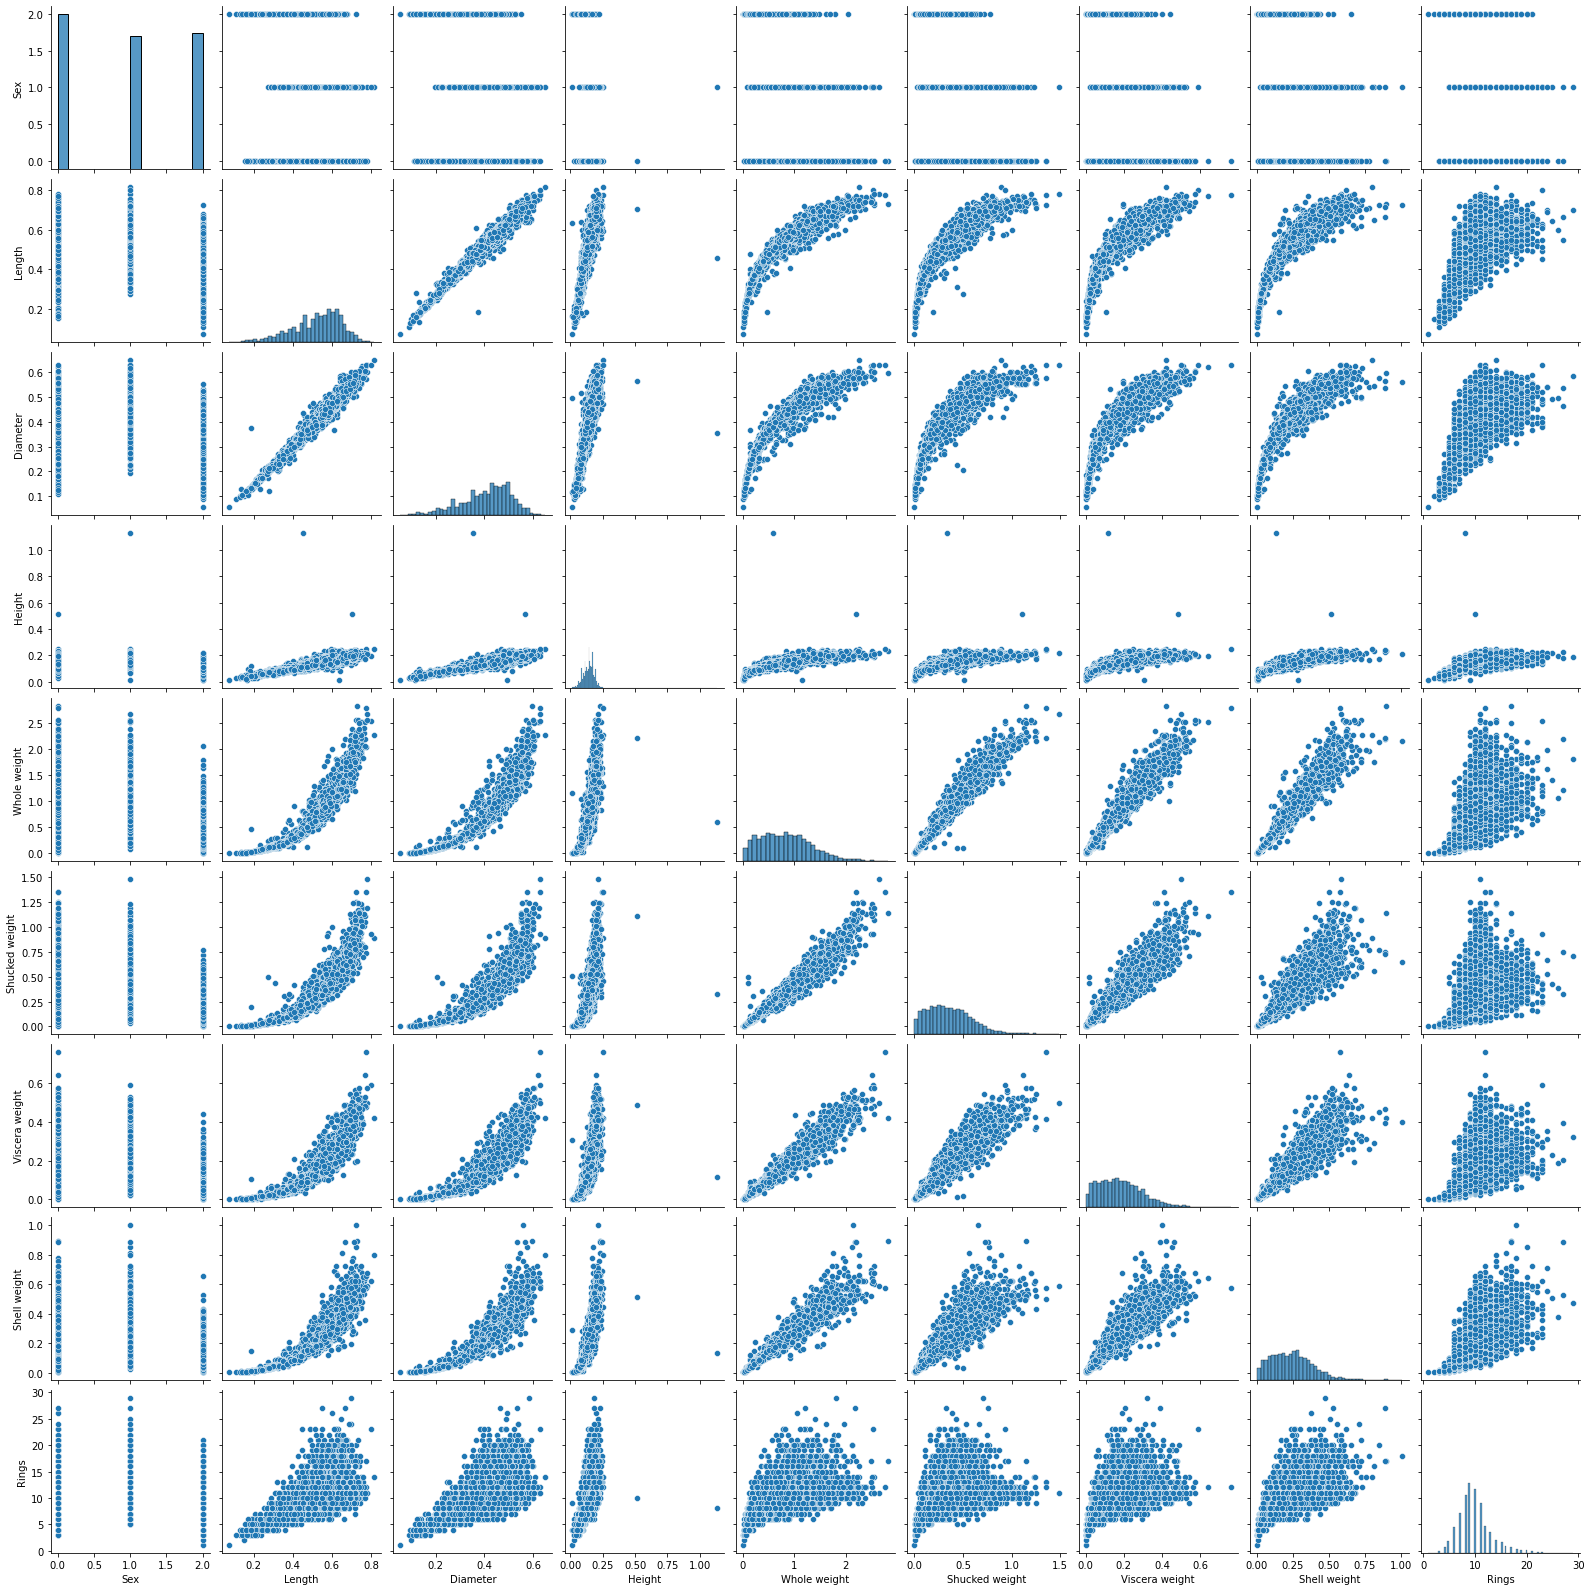

In [12]:
import seaborn as sns 
# Se importa la biblioteca seaborn para mostrar la relación 
# entre todos los datos
sns.pairplot(abalone); # Se muestran todos los datos

d) (2 puntos) Despliegue un mapa de calor de los datos.

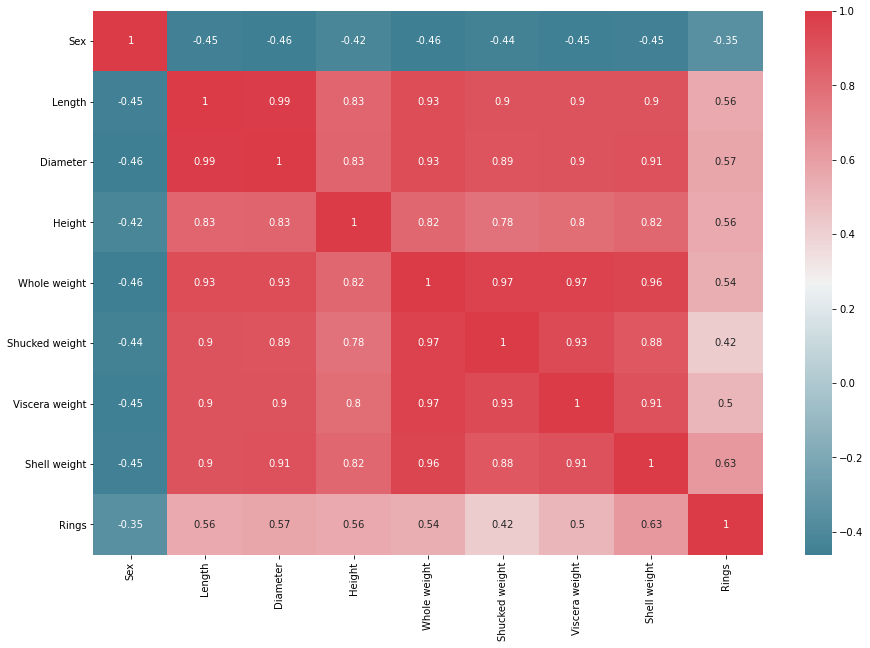

In [13]:
# Función para generar el mapa de calor de un conjunto de datos
def correlationheatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
# Se calcula el mapa de calor    
correlationheatmap(abalone)

e) (7 puntos) Aplíquele la técnica del PCA. Grafice la varianza explicada y los componentes principales (como el ejemplo visto en clase).

test            Sex    Length  Diameter    Height  Whole weight  Shucked weight  \
0    -1.153768 -0.575207 -0.432777 -1.068491     -0.642408       -0.608127   
1    -1.153768 -1.449702 -1.440640 -1.188322     -1.230765       -1.171306   
2     0.054404  0.049433  0.121547 -0.109843     -0.309992       -0.463953   
3    -1.153768 -0.700135 -0.432777 -0.349505     -0.638330       -0.648676   
4     1.262575 -1.616272 -1.541426 -1.427984     -1.272572       -1.216360   
...        ...       ...       ...       ...           ...             ...   
4172  0.054404  0.340931  0.423906  0.609144      0.118274        0.047413   
4173 -1.153768  0.549144  0.323120 -0.109843      0.279383        0.358288   
4174 -1.153768  0.632429  0.675872  1.567792      0.707650        0.748008   
4175  0.054404  0.840642  0.776658  0.249650      0.541441        0.772788   
4176 -1.153768  1.548567  1.482162  1.328130      2.283057        2.640289   

      Viscera weight  Shell weight  
0          -0.726722 

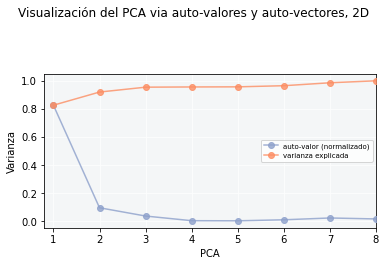

In [21]:
# Se procede a realizar la tecnica de PCA

# Se prepara el primer conjunto de datos
X = abalone.drop(['Rings'], axis = 1)

# Se calcula un escalar del conjunto de datos
X_zscaled = (X - X.mean()) / X.std(ddof=1)
print('test', X_zscaled)

# Se genera otro conjunto de datos donde se clasifica la edad segun el número de anillos
# 0 si posee un número de anillos menor a 9
# 1 si posee un número de anillos menor a 11
# 2 si posee un número de anillos mayor e igual a 11
df_1 = abalone.copy()
edades = []
for i in df_1['Rings']:
    if i < 9:
        edades.append('G1')
    elif i < 11:
        edades.append('G2')
    else:
        edades.append('G3')
df_1['Age'] = edades

Y = df_1.Age

# Se calcula los auto-valores y auto-vectores de la matriz de covarianza
eigenvalues, eigenvectors = np.linalg.eig(X_zscaled.cov())

# Se normalizan los datos
eigenvalues_normalized = eigenvalues / eigenvalues.sum()

# Se calcula la varianza explicada
# Devuelve la suma acumulativa de los elementos a lo largo de un eje dado. 
cumvar_explained = np.cumsum(eigenvalues_normalized)

print("Auto-valores:")
print(eigenvalues)

print("Auto-vectores:")
print( eigenvectors)

print("Auto-valores normalizados:")
print(eigenvalues_normalized)

print("Varianza explicada acumulada:")
print( cumvar_explained )

print("--------------------------------------------------------")

# Se procede a rroyecta los datos
T = pd.DataFrame(X_zscaled.dot(eigenvectors))

# Se le asigna un nombre a las columnas de los datos
T.columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8']

# Se realiza una concatenación entre los conjuntos de datos
T = pd.concat([T, Y], axis=1)

print("Parte de las muestras proyectadas")
print(T.head(5))
print('---------------------------------')
'''---------------------------------'''

# Separa por la etiqueta 
edades = [T[T.Age=='G1'],
          T[T.Age=='G2'],
          T[T.Age=='G3']]

# A cada grupo de edades se le asigna un color
colors = ['#1b9e77', '#d95f02', '#7570b3']

_, ax1 = plt.subplots(1)


# Muestra el componente principal respecto al total de varianza en los datos
ax1.plot([1,2,3,4,5,6,7,8],
         eigenvalues_normalized,
         '-o',
         color='#8da0cb',
         label='auto-valor (normalizado)',
         alpha=0.8,
         zorder=1000)

# Muestra la varianza explicada según los datos
ax1.plot([1,2,3,4,5,6,7,8],
         cumvar_explained,
         '-o',
         color='#fc8d62',
         label='varianza explicada',
         alpha=0.8,
         zorder=1000)

ax1.set_xlim(0.8, 4.2)
ax1.set_xticks([1,2,3,4,5,6,7,8])
ax1.set_xlabel('PCA')
ax1.set_ylabel('Varianza')
ax1.legend(loc='center right', fontsize=7)
ax1.grid(color='#fdfefe')
ax1.set_facecolor('#f4f6f7')

# Se muestran los datos
plt.suptitle(r'Visualización del PCA via auto-valores y auto-vectores, 2D')
plt.tight_layout(pad=3.0)
plt.show() 

f) (7 puntos) A partir del resultado anterior, seleccione los dos primeros componentes, proyecte el conjunto de datos en estos dos componentes y grafique los valores proyectados en esos dos componentes principales.

1       G1
4       G1
5       G1
16      G1
18      G1
        ..
4163    G1
4164    G1
4165    G1
4168    G1
4171    G1
Name: Age, Length: 1405, dtype: object
2       G2
3       G2
8       G2
11      G2
13      G2
        ..
4169    G2
4170    G2
4173    G2
4174    G2
4175    G2
Name: Age, Length: 1323, dtype: object
0       G3
6       G3
7       G3
9       G3
10      G3
        ..
4148    G3
4160    G3
4161    G3
4172    G3
4176    G3
Name: Age, Length: 1447, dtype: object


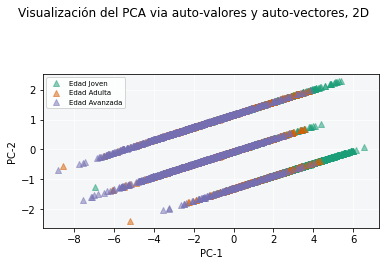

In [20]:
#########################################
# Segundo gráfico
#########################################
# Usa solo dos componentes principales, en este caso utiliza pc1 y pc2
_, ax2 = plt.subplots(1)

for group, color in zip(edades, colors):
    print(group.Age)
    ax2.scatter(group.pc1,
                group.pc2,
                marker='^',
                color=color,
                label=group.Age,
                alpha=0.5,
                zorder=1000)
    
ax2.set_xlabel(r'PC-1')
ax2.set_ylabel(r'PC-2')
ax2.grid(color='#fdfefe')
ax2.set_facecolor('#f4f6f7')
ax2.legend(labels=['Edad Joven', 'Edad Adulta', 'Edad Avanzada'], fontsize=7)

# Se muestran los datos
plt.suptitle(r'Visualización del PCA via auto-valores y auto-vectores, 2D')
plt.tight_layout(pad=3.0)
plt.show()    

## Pregunta 5. Graficación (5 puntos)

---
Para las siguientes funciones:

Función 1:

$f_{1}\left(x_{1},x_{2}\right)=\left(x_{1}-0.7\right)^{2}+\left(x_{2}-0.5\right)^{2}$


Función 2: 

$f_{2}\left(x_{1},x_{2}\right)=x_{1}e^{\left(-x_{1}^{2}-x_{2}^{2}\right)}$


Realice lo siguiente:

En python, cree una función que le permita graficar las funciones anteriores. Utilizando la función en python genere dos gráficos, uno para cada función (𝑓1 y 𝑓2). 

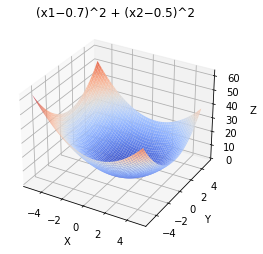

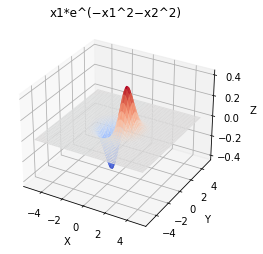

In [16]:
from matplotlib import cm

# Método que representa a la primera función expuesta en el problema.
def func1(x1, x2):
    return (x1 - 0.7)*(x1 - 0.7) + (x2 - 0.5)*(x2 - 0.5)

# Método que representa a la segunda función expuesta en el problema.
def func2(x1, x2):
    return x1 * math.pow(math.e, -(x1*x1) -(x2*x2))

# Función para graficar en 3 dimensiones. Se recibe la función a 
# graficar y el título que se le pondrá
def graficar_funcion_R3(funcion, titulo):
    
    # Se definen las dimensiones del área a graficar
    x = y = np.arange(-5, 5, 0.05)
    X, Y = np.meshgrid(x, y)
    zs = np.array([funcion(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    # Operaciones para el manejo del gráfico
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.title(titulo)
    
    plt.show()

graficar_funcion_R3(func1, '(x1−0.7)^2 + (x2−0.5)^2')
graficar_funcion_R3(func2, 'x1*e^(−x1^2−x2^2)')